In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [182]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [183]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [184]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [185]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [186]:
test.shape

(418, 11)

In [187]:
train.shape

(891, 12)

In [188]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

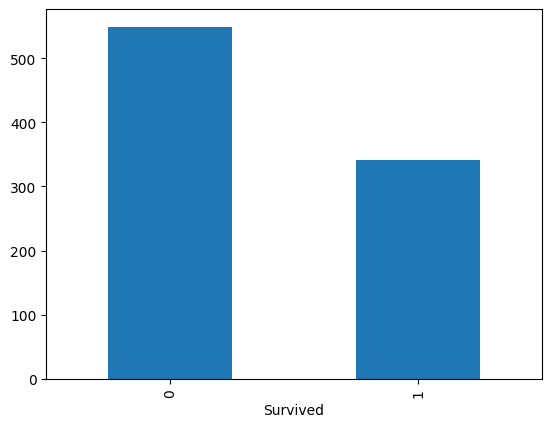

In [189]:
train['Survived'].value_counts().plot.bar()

In [190]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [191]:
missing_values_train=train.isnull().sum()
perc_train=missing_values_train/len(train)*100
missing_values_train = perc_train.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_values_train

,column,percent missing
0,PassengerId,0.000000
1,Survived,0.000000
2,Pclass,0.000000
3,Name,0.000000
4,Sex,0.000000
5,Age,19.865320
6,SibSp,0.000000
7,Parch,0.000000
8,Ticket,0.000000
9,Fare,0.000000


<Axes: >

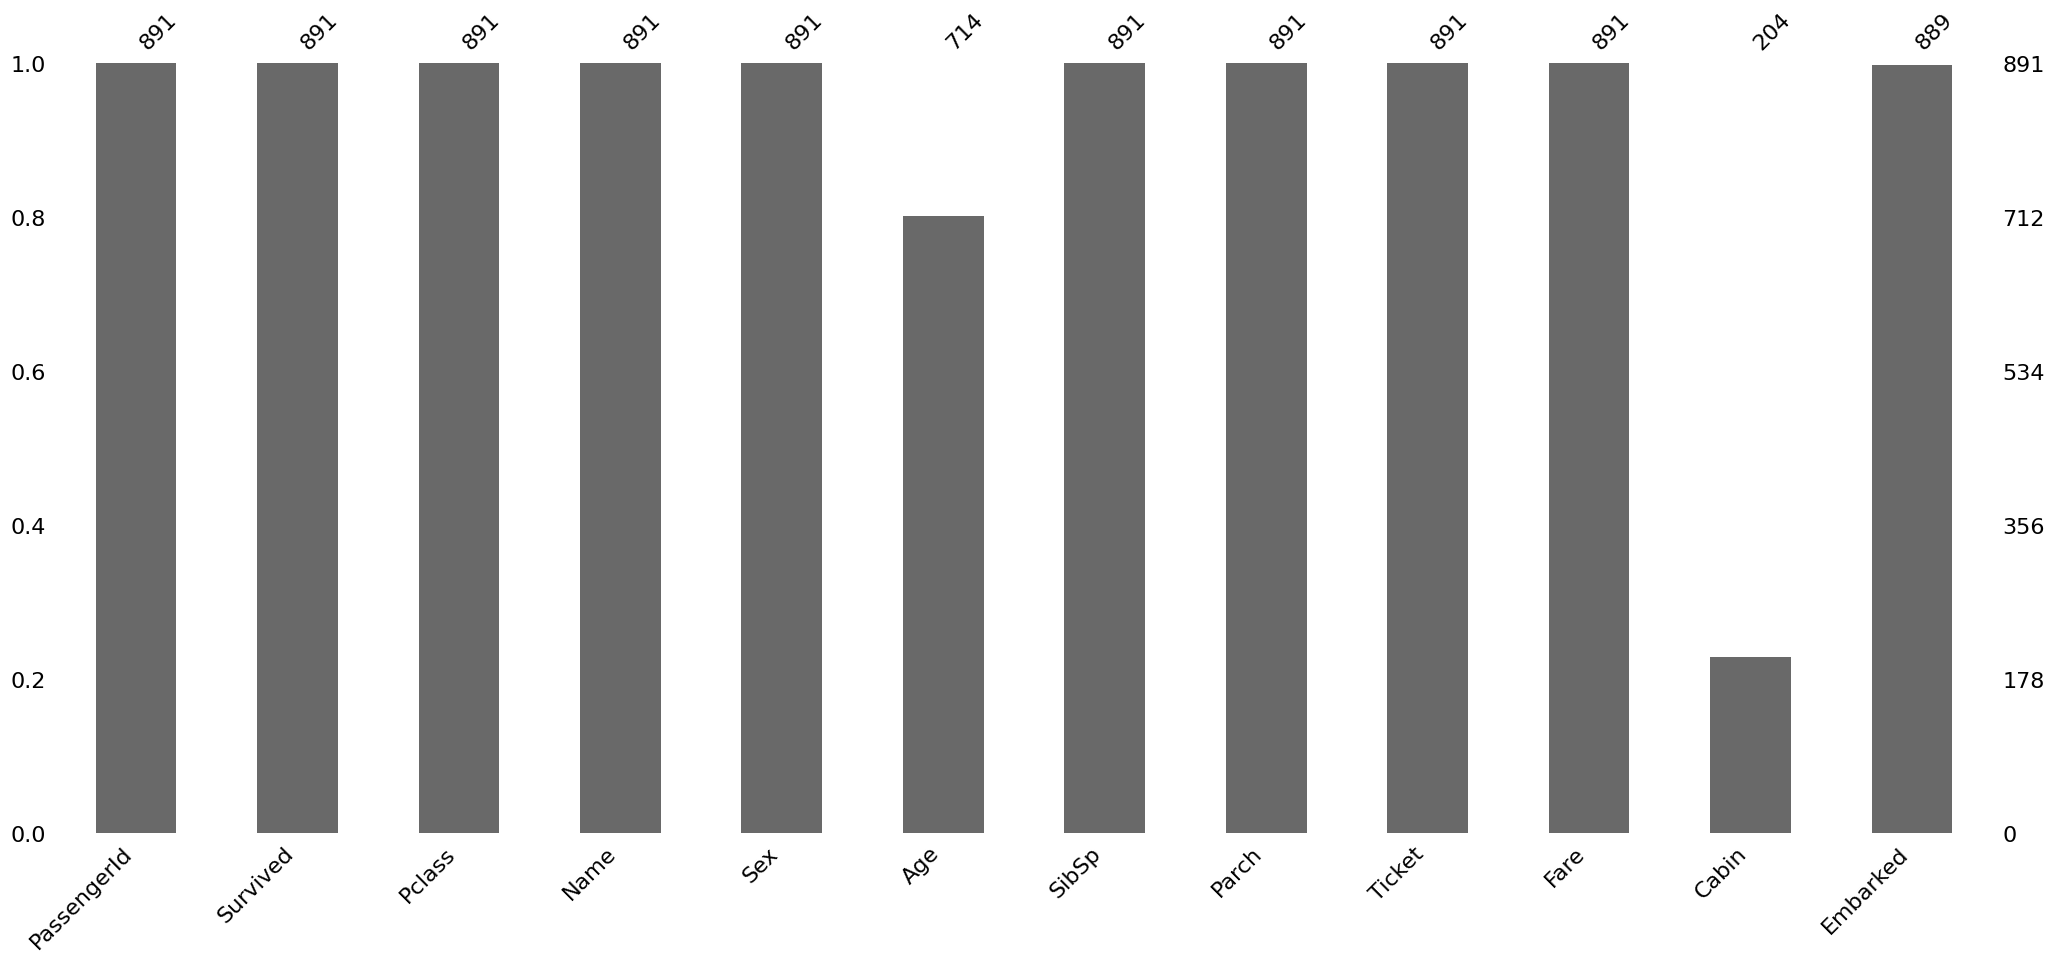

In [192]:
msno.bar(train)

<Axes: >

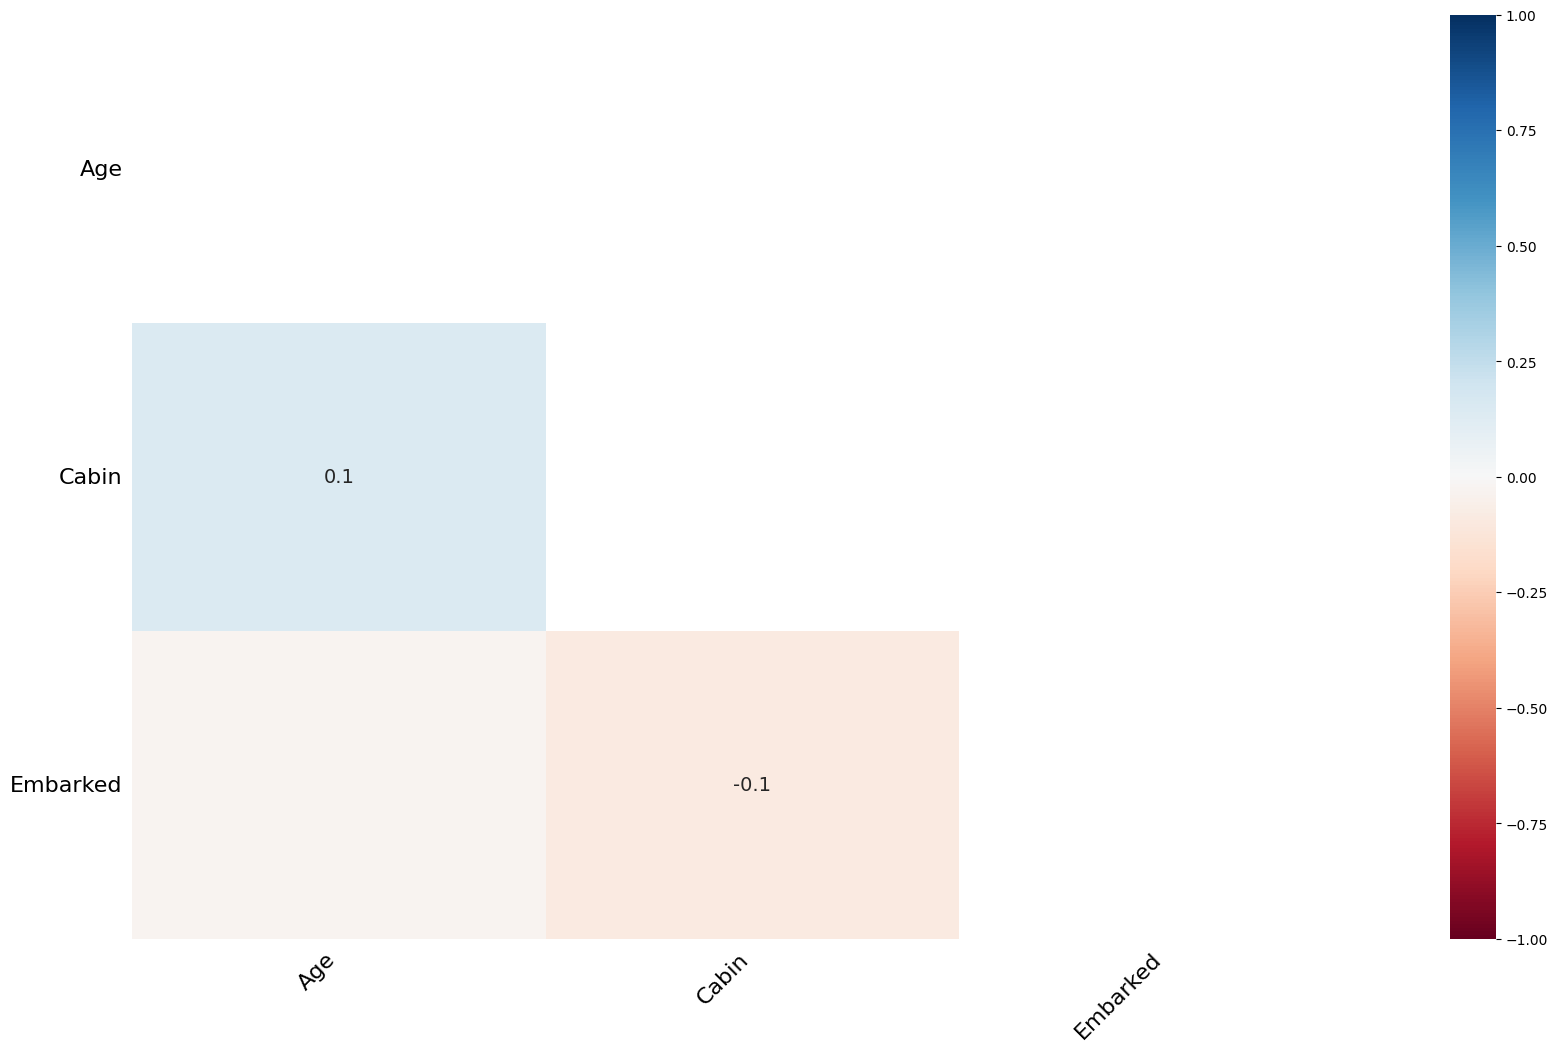

In [193]:
msno.heatmap(train)

In [194]:
missing_values_test=test.isnull().sum()
perc_test=missing_values_test/len(test)*100
missing_values_test = perc_test.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_values_test

,column,percent missing
0,PassengerId,0.000000
1,Pclass,0.000000
2,Name,0.000000
3,Sex,0.000000
4,Age,20.574163
5,SibSp,0.000000
6,Parch,0.000000
7,Ticket,0.000000
8,Fare,0.239234
9,Cabin,78.229665


<Axes: >

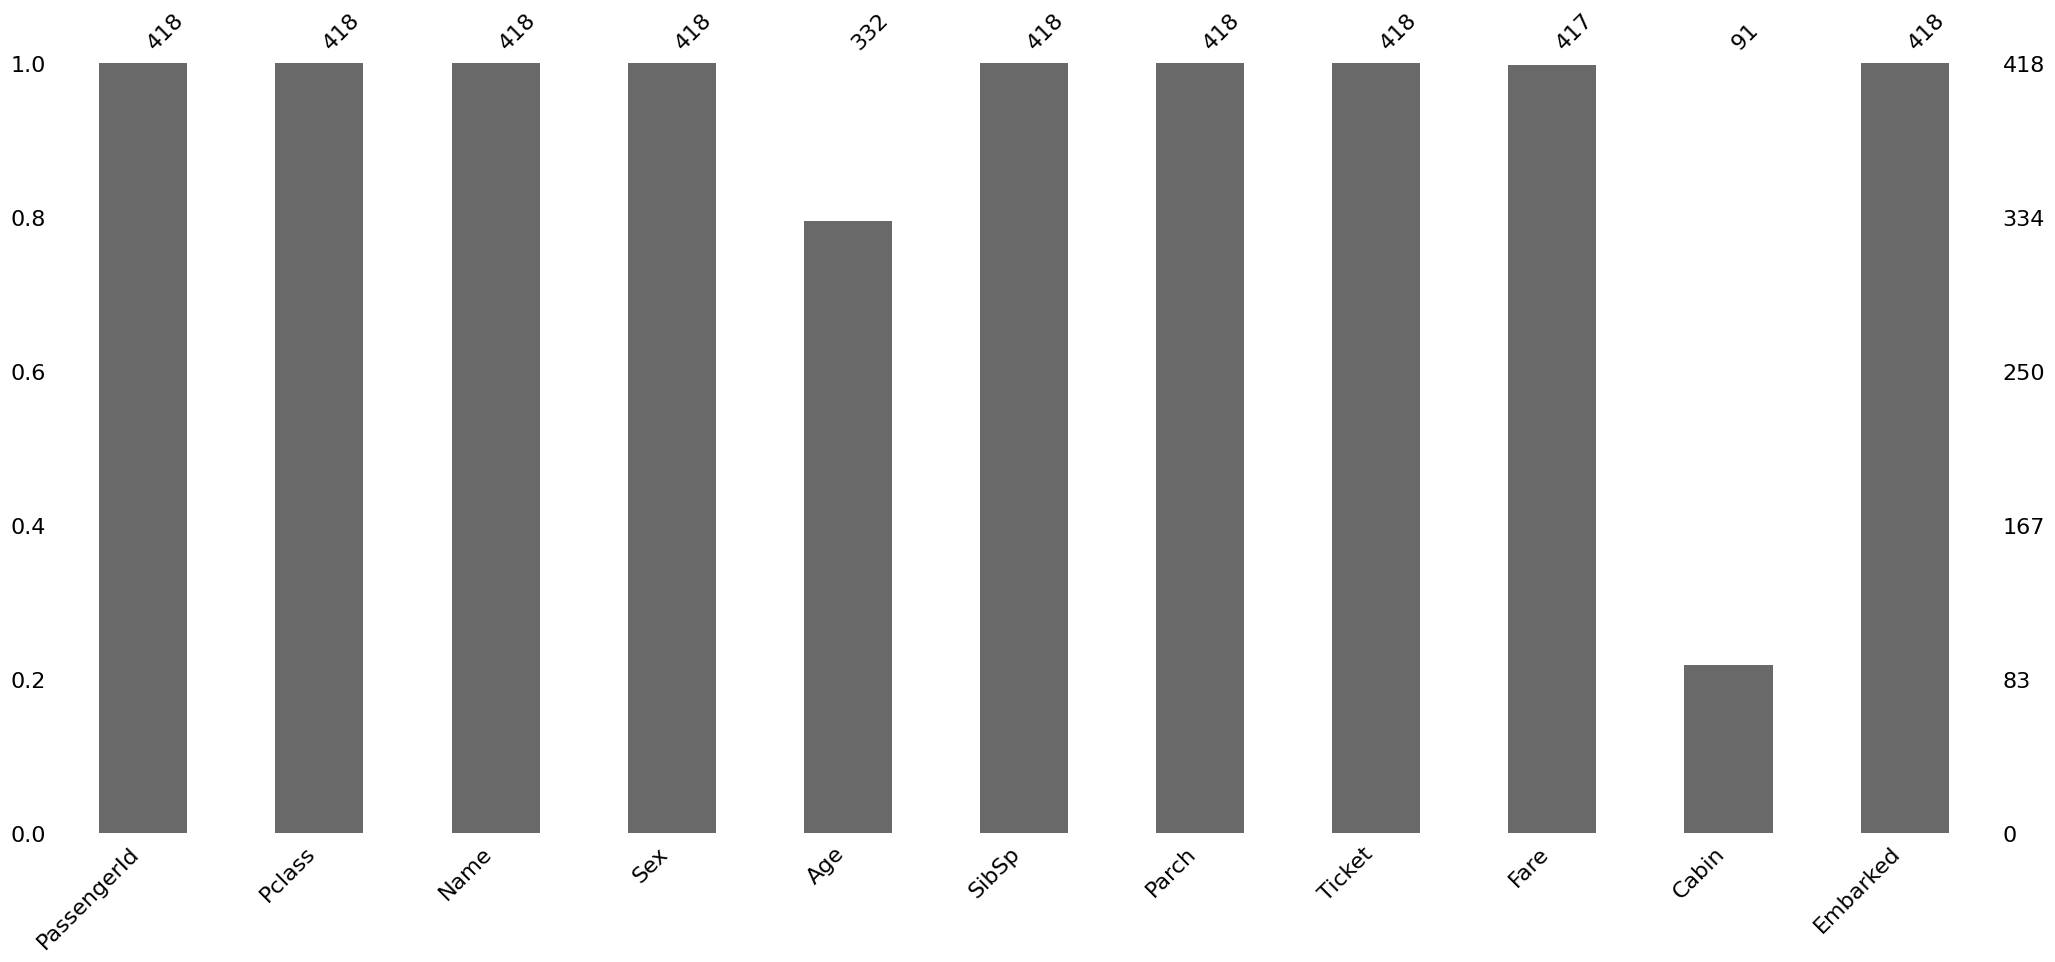

In [195]:
msno.bar(test)

<Axes: >

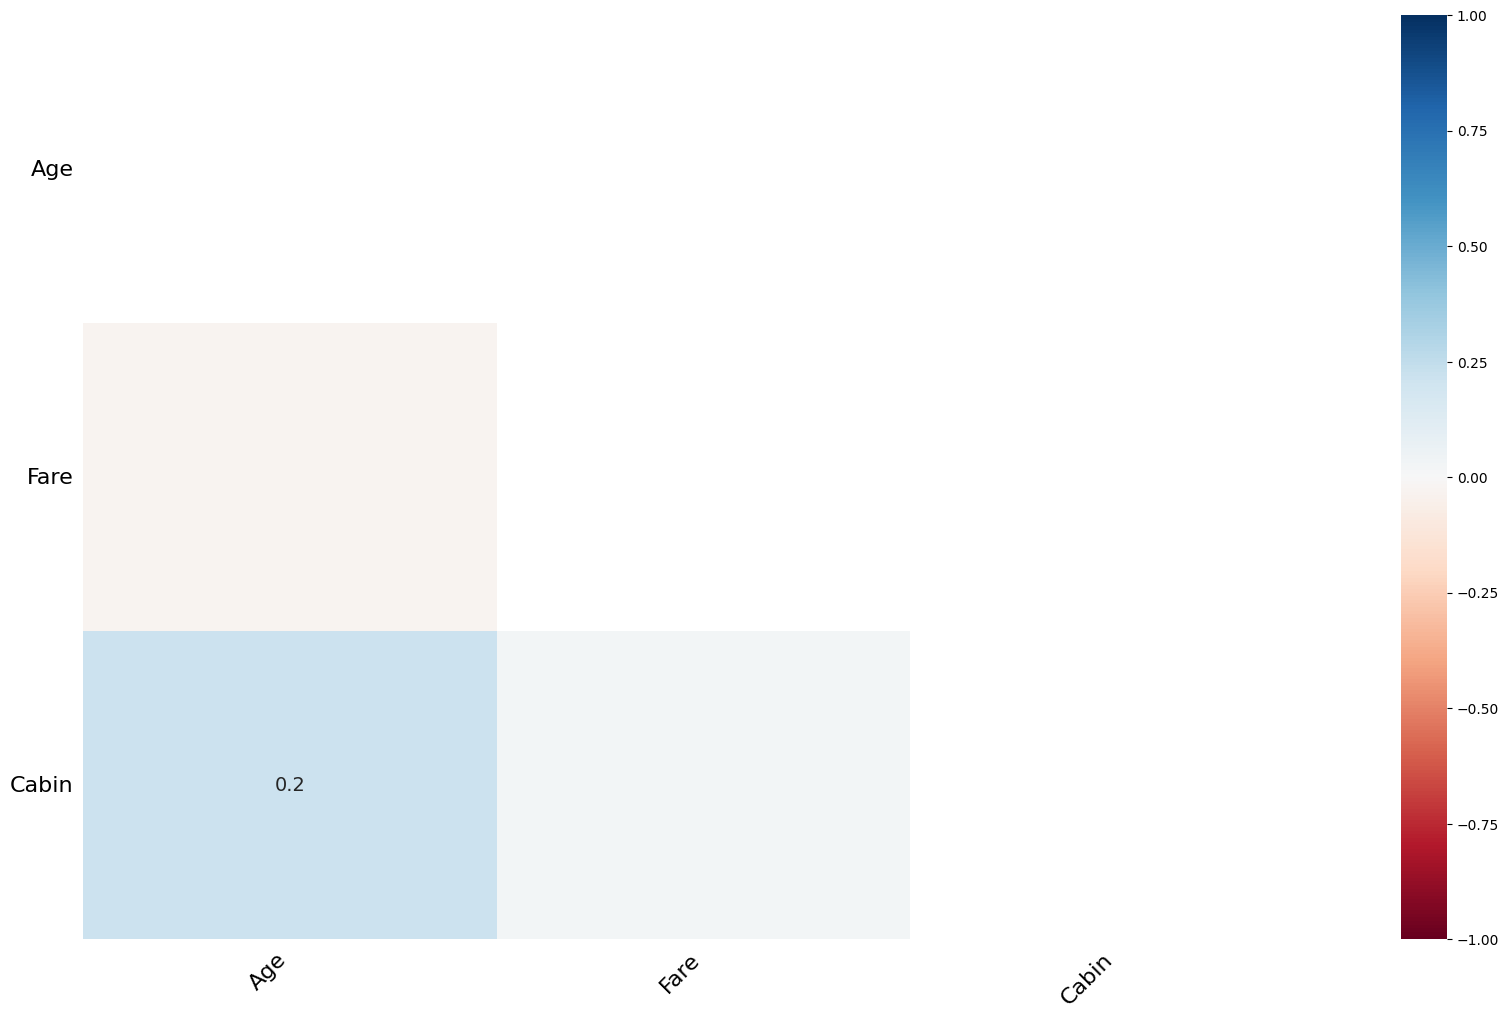

In [196]:
msno.heatmap(test)

<Axes: >

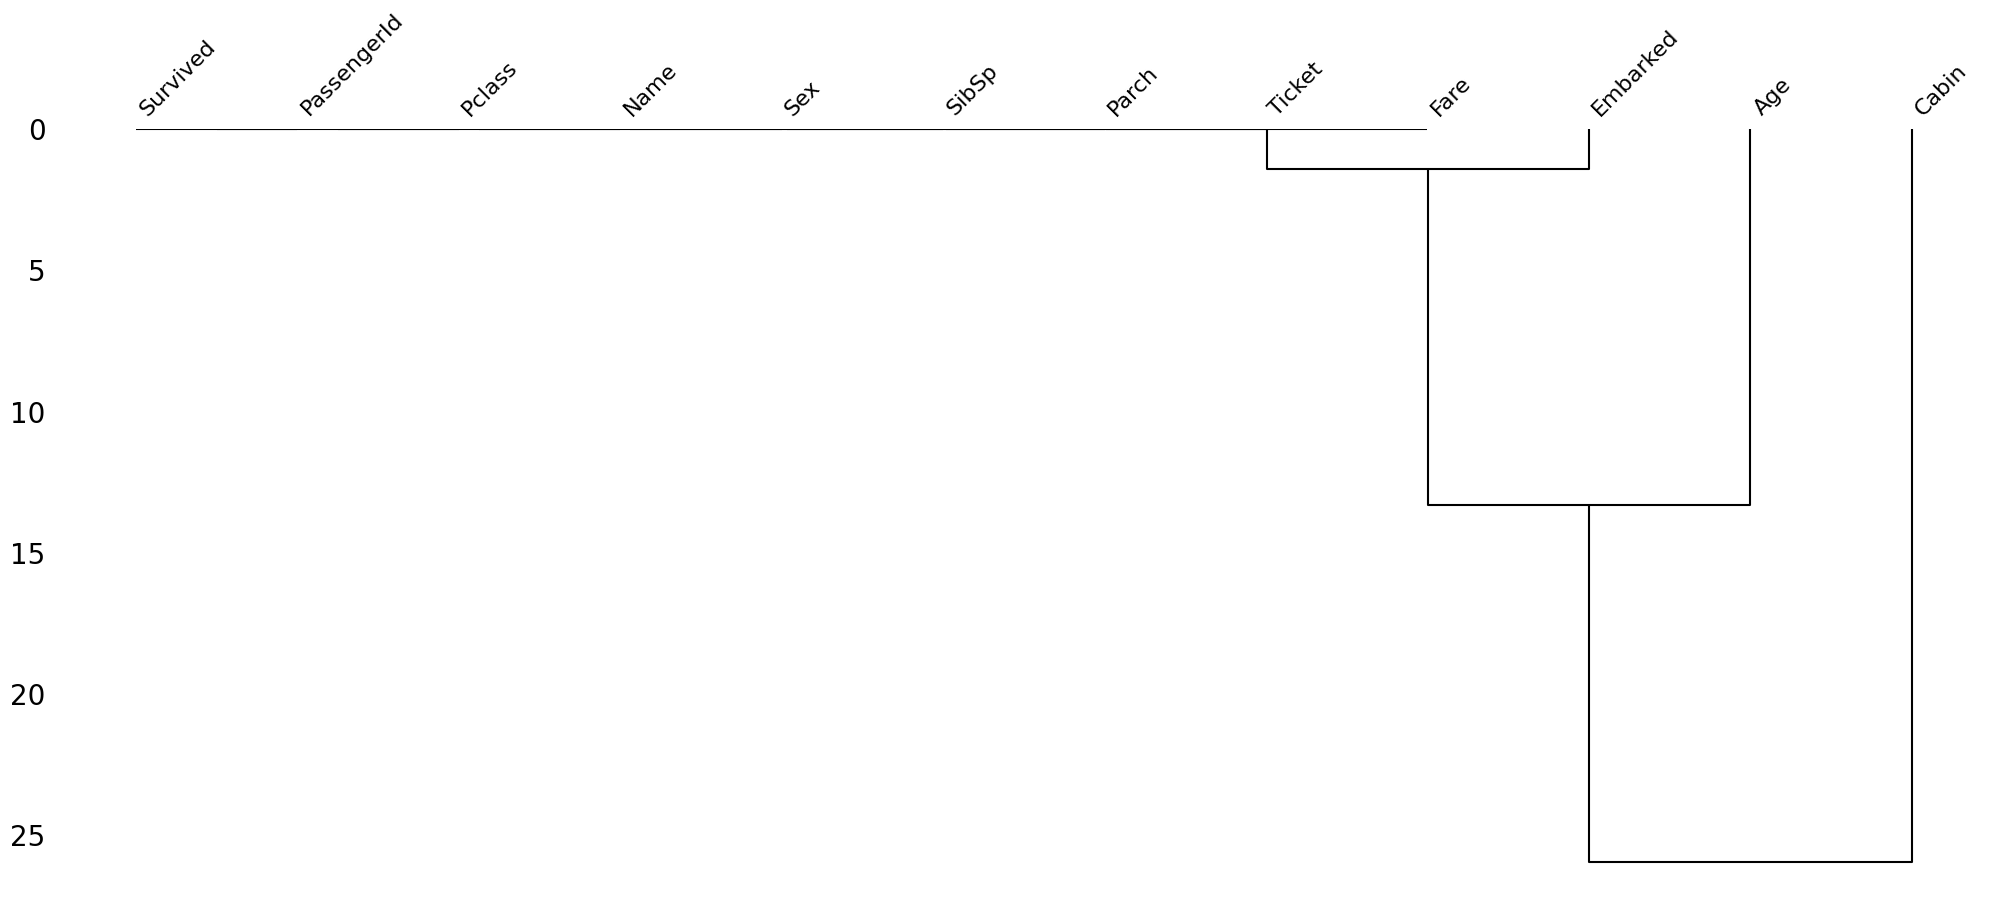

In [197]:
msno.dendrogram(train)

In [198]:
train1=train.copy()

In [199]:
train1['Age'].mean()

np.float64(29.69911764705882)

In [200]:
train1.dropna(subset=['Age'],how='any',inplace=True)

In [201]:
train1.Age.isnull().sum()

np.int64(0)

In [202]:
train1.shape

(714, 12)

In [203]:
train2=train.copy()

In [206]:
train2.dropna(subset=['Cabin'],how='any',inplace=True)
train2.Cabin.isnull().sum()
#imp=SimpleImputer(strategy='constant',fill_value=0)
#train2=imp.fit_transform(train2)

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

AttributeError: 'numpy.ndarray' object has no attribute 'isn'

In [ ]:
train3=train.copy()

In [ ]:
imp=SimpleImputer(strategy='most_frequent')
train3=imp.fit_transform(train3)

In [ ]:
train3.shape

(891, 12)

In [ ]:
one_hot_destination = pd.get_dummies(train.HomePlanet)
train=pd.get_dummies()
pd.get_dummies(train.HomePlanet)